# Film Recommendation System

## Importing Libaries and Data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Import literal eval  
from ast import literal_eval

# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
# reads file into df1 

df1 = pd.read_csv('/Users/rhyscrooks/Desktop/Python/Data/tmdb_5000_credits.csv.zip')
#df1.head()

In [40]:
# reads file into df2 

df2 = pd.read_csv('/Users/rhyscrooks/Desktop/Python/Data/tmdb_movie_dataset_v11.csv')
#df2.head() 

In [41]:
# Must rename colums to match on 'id'

# renames columns 
df1.columns = ['id', 'tittle', 'cast', 'crew'] 

# Joins dfs based on 'id' 
df2 = df2.merge(df1, on = 'id')
#df2.head()

In [42]:
# prints a list of colum titles 

print(df2.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords', 'tittle', 'cast', 'crew'],
      dtype='object')


In [43]:
# Used list to remove unnecessary columns 

df = df2.drop(columns=['status', 'adult', 'backdrop_path', 'homepage', 'imdb_id', 'original_language', 'original_title', 'poster_path', 'production_countries', 'spoken_languages', 'tittle'])
#print(len(df['id']))
#df.head()

## Ranking by Ratings
### Calculating Weighted Rating 

Rather than using vote average which is influenced by the number of votes we will use IMDB's weighted rating formula 

Weighted Rating (WR) = (v / (v + m)) * R + (m / (v + m)) * C

where ...
- R = average (mean) vote for the movie
- v = number of votes 
- m = minimum number of votes (IMDB use 25,000)
- C = average (mean) vote across dataset 


In [44]:
# calculating C 

C = df['vote_average'].mean()
print(C)

6.3089376563803174


In [45]:
# Calculating m 

m = 25000 

# creates a copy of df of movies with a vote count greater than m
movies_df = df.copy().loc[df['vote_count'] >= m]

# .shape shows the number of columns and rows 
print(movies_df.shape)

(11, 16)


##### Only 11 movies qualified for this criteria. Minimum number of votes needs to be re-calculated.  

In [46]:
# assigns m the 75th percentile (2456.25)

m = df['vote_count'].quantile(0.75)
print(m)

2456.25


In [47]:
# creates a copy of df where vote count is greater than m (.loc selects 'vote_count' column)
# prints the length of movies included in the new movies_df 

movies_df = df.copy().loc[df['vote_count'] >= m]
print('Number of Eligible Movites:', len(movies_df['id']))

Number of Eligible Movites: 1199


In [48]:
# Weighted rating function 

def weighted_rating(x, m=m, C=C): 
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m)) * R + (m / (v + m) * C)

### Calculating Weigthed Rating 'Score'

In [49]:
# applies weighted_rating to movies_df 

movies_df['score'] = movies_df.apply(weighted_rating, axis = 1)

# sorts movies_df into descending 'score' and re-assigns it to movies_df

movies_df = movies_df.sort_values('score', ascending = False)

# creates a movies_df sub table with only these column titles
movies_df[['title', 'vote_count', 'vote_average', 'score', 'popularity']].head(20)


,title,vote_count,vote_average,score,popularity
13,The Shawshank Redemption,24649,8.702,8.485143,122.610
43,The Godfather,18677,8.707,8.428281,158.448
2,The Dark Knight,30619,8.512,8.348395,130.643
8,Pulp Fiction,25893,8.488,8.299201,74.862
9,Forrest Gump,25409,8.477,8.285891,92.693
1,Interstellar,32571,8.417,8.269174,140.241
6,Fight Club,27238,8.438,8.261888,69.498
17,The Lord of the Rings: The Return of the King,22334,8.474,8.259483,99.276
86,Schindler's List,14594,8.573,8.246840,65.084
0,Inception,34495,8.364,8.227394,83.952


## Ranked by Profit

In [50]:
# Function to calculate profitability 

def profitability_calculator(x): 
    cost = x['budget'] 
    revenue = x['revenue'] 
    profit = revenue - cost
    return (profit) 

In [51]:
# Apllies profitability calculator to movies_df 
movies_df['profit'] = movies_df.apply(profitability_calculator, axis=1)

# sorts them in descending value and re-assigns it to movies_df
movies_df = movies_df.sort_values('profit', ascending = False)

# creates a sub table of only these columns 
movies_df[['title', 'budget', 'revenue', 'profit', 'popularity']].head()

,title,budget,revenue,profit,popularity
3,Avatar,237000000,2923706026,2686706026,79.932
15,Titanic,200000000,2264162353,2064162353,102.348
36,Jurassic World,150000000,1671537444,1521537444,54.089
206,Furious 7,190000000,1515341399,1325341399,62.276
4,The Avengers,220000000,1518815515,1298815515,98.082


### Profitability graphs


Text(0.5, 1.0, '10 Most Profitable Movies')

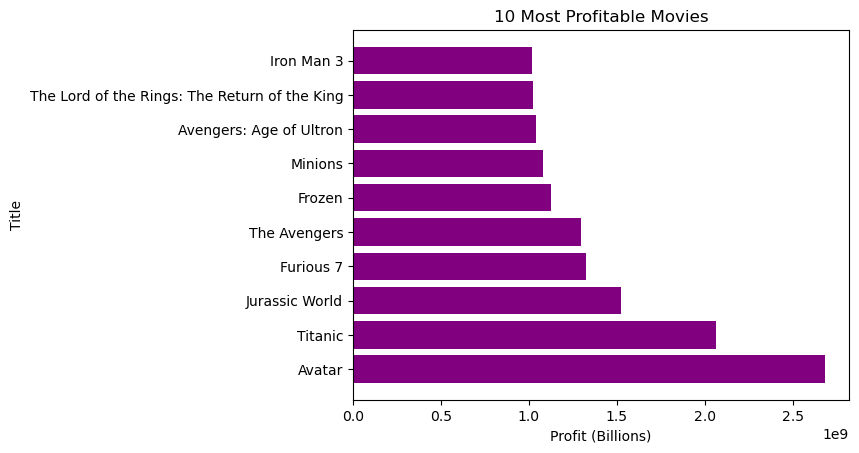

In [52]:
# create new df that is just top 10 of movies_df 
top10 = movies_df.head(10) 

plt.barh(top10['title'], top10['profit'], align = 'center', color= 'purple')
plt.xlabel('Profit (Billions)') 
plt.ylabel('Title')
plt.title('10 Most Profitable Movies')

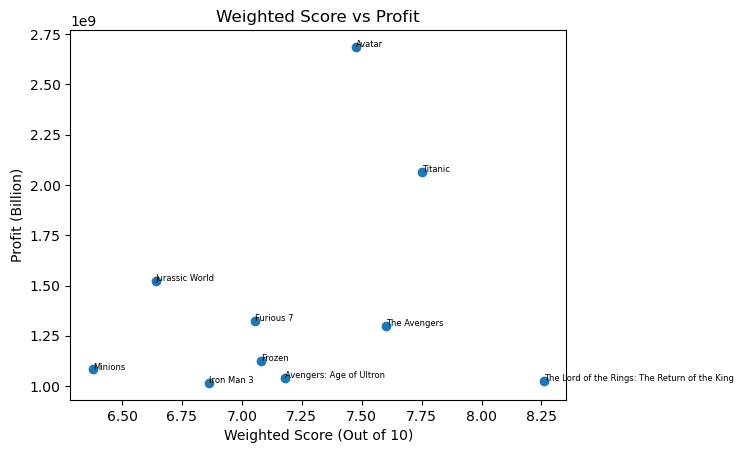

In [53]:
# creates a sctter plot with score on x axis and profit on y axis 

plt.scatter(top10['score'], top10['profit']) 

plt.title('Weighted Score vs Profit') 
plt.xlabel('Weighted Score (Out of 10)') 
plt.ylabel('Profit (Billion)')

# loop through top 1o rows of top 10 
# place a text label on coordinates of 'score' and 'profit' and make the fontsize 6

for i in range(len(top10)): 
    plt.text(movies_df['score'].iloc[i],movies_df['profit'].iloc[i], movies_df['title'].iloc[i], fontsize=6)

## Recomending based on 'Overview'

We wont be using a minimun score and therefore can return to original 'df'. 
We need to generate numerical data from text in order to recomend by overview, cast, crew etc. 

### TF-IDF (term frequency-inverse document frequency) 
Term frequnecy (TF) = term instances/total instances 
inverse document frequency (IDF) = log(number of documents/documents with the term) 
the overall importance of the word is TF*IDF

quantifies the importance of each word creating a matrix of movies (columns) and rows (words from all overviews). Common words are given less weight whereas uncommon words are given more weight. enables us to find similar movies based on plot. 



In [54]:
# converts text into a numerical matrix ignoring 'stopwords' 
# stopwords are common english words like the, and, or in 

tfidf = TfidfVectorizer(stop_words = 'english') 

# replace any NaN's in overview with a blank string 

df['overview'] = df['overview'].fillna('')

# construct a tf-idf matrix by fitting and transforming the data 
tfidf_matrix = tfidf.fit_transform(df['overview']) 

# display shape of the matrix 
tfidf_matrix.shape

(4796, 19848)

4796 movies with 19,848 different words

### Scoring Similarity Between Words 

Cosine similarity is the most common method of scoring the similarity for TF-IDF and is not effected by the magnitude (length) of overviews. 

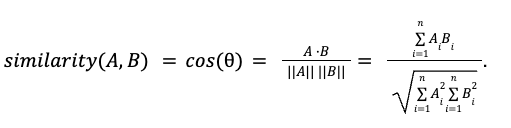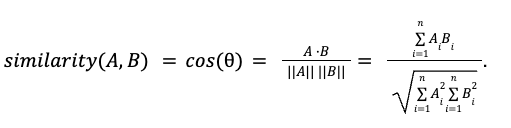

TF-IDF already gives us normalised vectors (scaled to magnitude of 1) therefore calculating the dot product will give us the cosine similarity using sklearns linear_kernel() 


In [55]:
# computign cosine similarity matrix 

csim = linear_kernel(tfidf_matrix, tfidf_matrix) 
print(csim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.01885768 0.         0.01008918]
 ...
 [0.         0.         0.01885768 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.01008918 ... 0.         0.         1.        ]]


We need a way to identify the index of the matrix using the title of the movie ... 

In [56]:
# Converts the 'title' of a film to it's index 
# Creates a dictionary style list (index, title) from the 'title' column. and then drop any duplicates 

indxs = pd.Series(df.index, index = df['title']).drop_duplicates() 
print(indxs['Inception'])

0


### Overview Recomender Function

In [57]:
# building funciton 

def get_recommendations(title, csim=csim):
    # get index of title
    idx = indxs[title] 
    
    # Get similarity scores for all movies with that movie 
    # Create a list of similarity scores for all movies, enumerating them into a tuple (movie_index, sim_score) 
    sim_scores = list(enumerate(csim[idx])) 
    
    # Ranks sim_scores in descending order 
    # 'key = lambda x:x[1]' uses tuple (idex, sim_score) position 1 to sort 
    # sorted() creates ascending order but 'reverse = True' reverses it into descending order 
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True) 

    # First 1 will always be itself so must select the one after (positions 1:11) 
    sim_scores = sim_scores[1:11]
    

    # Collect indexes of top 10 sim_scores 
    # From each tuple in the list of tuples 'sim_scores' retrieve index from position 0 
    movie_indices = [i[0] for i in sim_scores]

    # return the 'title' from df by ilocing movie indices 
    return df['title'].iloc[movie_indices]

In [58]:
# title = input("Give me 10 similar movies to this movie ...")

get_recommendations('The Avengers')

20              Avengers: Age of Ultron
3624                            Plastic
768                            Hercules
2126                            Timecop
4728                 This Thing of Ours
3430                      The Corruptor
1808    Wall Street: Money Never Sleeps
1583         Team America: World Police
422                           Allegiant
255                         Snowpiercer
Name: title, dtype: object

## Recommending based on Cast, Crew, Plot Keywords and Genre 

Some data is stringified, meaning the data is inside one big string. For example both cast and crew are one string containing a list of dictionaries whereas keywords and genres are just a regular list. The stringified data must be undone to access individual data. 

In [59]:
#print(df['cast'][0]) #stringified
#print(df['crew'][0]) #stringified
#print(df['keywords'][0]) #regular list
#print(df['genres'][0]) #regular list

#print('CAST', df['cast'][0], 'CREW', df['crew'][0], 'KEYWORDS', df['keywords'][0], 'GENRES', df['genres'][0])

In [60]:
# convert 'crew' and 'cast' from a stringified list of dictionaries into a list of dictionaries  

features = ['crew', 'cast']
for feature in features: 
    df[feature] = df[feature].apply(literal_eval)

# All are now regular lists 
#print('CAST', df['cast'][0], 'CREW', df['crew'][0], 'KEYWORDS', df['keywords'][0], 'GENRES', df['genres'][0])

In [61]:
# Get director fucntion. Careful of case, some have capitals some dont. must check. 

def get_director(x): 

    # for i (movie) in x (crew) 
    for i in x: 

        # if 'job' is 'Director' return 'name'
        if i['job'] == 'Director': 
            return i['name'] 
            
    # if no 'Director' return NaN - careful of indentation, we went it to run through all 'crew' not just the first variable 
    return np.nan

# create a column called director where variable is equal to the 
df['director'] = df['crew'].apply(get_director)

#print(df['director'])

In [62]:
#print(df['cast'][12])

In [63]:
# cast list 

def get_cast(x): 

    # check if its a list 
    if isinstance(x, list):

        # if it is a list return 'names' 
        names = [i['name'] for i in x]

        #if 'names' is longer than 3 return frist 3 names
        if len(names) > 3: 
            return(names[:3])
        return(names)

# applies get_cast to cast column storing results in df as cast 
df['cast'] = df['cast'].apply(get_cast)
#print(df['cast'][12])

In [64]:
# check class 

#print(df['keywords'][0]) #double checks if it is stringified
#print(type(df['keywords'][0])) # checks class type

In [65]:
def get_lists(x): 

    # checks if it is a
    if isinstance(x, str): 

        # it is not a list, its one big string that must be sepearated
        # seperate based on comma and store strings in words
        words = x.split(',')

        # return first 3 strings in words
        return words[:3]

    # return empty if it is not a string
    return []

df['keywords'] = df['keywords'].apply(get_lists)
#print(df['keywords'][12])
df['genre'] = df['genres'].apply(get_lists)
#print(df['genre'][12])

In [66]:
# applies get lists to keywords and genres replacing the data with the output  

features = ['keywords', 'genres'] 
for feature in features: 
    df[feature] = df[feature].apply(get_lists)

In [67]:
df[['title', 'director', 'cast', 'genres', 'keywords']].head(3)

,title,director,cast,genres,keywords
0,Inception,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...","[Action, Science Fiction, Adventure]","[rescue, mission, dream]"
1,Interstellar,Christopher Nolan,"[Matthew McConaughey, Jessica Chastain, Anne H...","[Adventure, Drama, Science Fiction]","[rescue, future, spacecraft]"
2,The Dark Knight,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]","[Drama, Action, Crime]","[joker, sadism, chaos]"


### Cleaning Data 

We need convert all data to strings, that are uniform (all lowercase no whitespace) 

In [68]:
def clean_data(x): 
    if isinstance(x, list): 
        return [str.lower(i.replace(" ", "")) for i in x]
    else: 
        if isinstance(x, str): 
            return str.lower(x.replace(" ", "")) 
        else: 
            return ' ' 

In [69]:
features = ['cast', 'director', 'genres', 'keywords'] 

for feature in features: 
    df[feature] = df[feature].apply(clean_data)

Now to create our metadata soup that we will feed to the vectorizer 

In [70]:
def soup_creator(x): 
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + x['director'] + ' ' + ' '.join(x['genres'])

df['soup'] = df.apply(soup_creator, axis=1) 

#print(df['soup'][0])

In [71]:
# text feature extraction similar to tf-idf but without weighting (tf-idf, down weights high frequency words, wouldnt make sense for director) 
# Discount common english words like 'and'
# creates a matrix of how many times the word appears 
count = CountVectorizer(stop_words = 'english')

# creates a count matrix with row as a film, column as words, and values as the frequency of that word 
# fit learns all the unique words (first use) 
# transfrom puts it into a matrix 
count_matrix = count.fit_transform(df['soup'])

# measures the angle between vectors 
# ovies with more common data will have higher cosine similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# resets indices according to title 
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'])

### Test 

In [72]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

4794      Amidst the Devil's Wings
34                   Batman Begins
2                  The Dark Knight
4637                Black November
4369            Machine Gun McCain
636     The Place Beyond the Pines
699                 Public Enemies
1494                     Unleashed
2821    The Baader Meinhof Complex
3169               The Glimmer Man
Name: title, dtype: object

In [89]:
get_recommendations('From Dusk Till Dawn' , cosine_sim2)

4552                         Wind Walkers
4721                            Unsullied
4491                The House of the Dead
2216                           Road House
2326                       The Peacemaker
4184    No Man's Land: The Rise of Reeker
103                            Black Swan
590              The Purge: Election Year
912                             Get Smart
1148                            Desperado
Name: title, dtype: object

## Improvements 

Increase the weight of director and cast. Additionally it is probably more likely that people like films of the same production company, this could also be incoporated. 